In [6]:
import sys
print(sys.path)


['C:\\Users\\ebrah\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\ebrah\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\ebrah\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\ebrah\\AppData\\Local\\Programs\\Python\\Python310', 'e:\\Machine Learning\\CodE\\1.Completed Projects\\Customer Churn\\.venv', '', 'e:\\Machine Learning\\CodE\\1.Completed Projects\\Customer Churn\\.venv\\lib\\site-packages', 'e:\\Machine Learning\\CodE\\1.Completed Projects\\Customer Churn\\.venv\\lib\\site-packages\\win32', 'e:\\Machine Learning\\CodE\\1.Completed Projects\\Customer Churn\\.venv\\lib\\site-packages\\win32\\lib', 'e:\\Machine Learning\\CodE\\1.Completed Projects\\Customer Churn\\.venv\\lib\\site-packages\\Pythonwin']


In [8]:
import sys
sys.path.append(r'c:\Users\ebrah\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py')

In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
albumentations               1.3.0
anltk                        1.0.4
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astor                        0.8.1
astroid                      2.11.7
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        22.1.0
autopep8                     1.6.0
Babel                        2.11.0
backcall                     0.2.0
Bashutils                    0.0.4
beautifulsoup4               4.11.1
bleach                       1.5.0
blinker                      1.9.0
bottle                       0.12.25
bottle-websocket             0.2.9
cachetools                   5.2.0
caer                         2.0.8
certifi                      2022.6.15
cffi                         1.15.1
charset-normalizer           2.1.0
click                        8.1.7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import imbalanced

ModuleNotFoundError: No module named 'sklearn'

In [2]:
!pip install seaborn

In [ ]:
# Get column info
def columns_info(df):
    cols=[]
    dtype=[]
    unique_v=[]
    n_unique_v=[]
    
    for col in df.columns:
        cols.append(col)
        dtype.append(df[col].dtypes)
        unique_v.append(df[col].unique())
        n_unique_v.append(df[col].nunique())
    
    return pd.DataFrame({'names':cols,'dtypes':dtype,'unique':unique_v,'n_unique':n_unique_v}) 

# Data Preprocessing 

**Document after every step**

## Data Collection

Note: automate as much as possible so you can easily get fresh data.

1. List the data you need and how much you need.

2. Find and document where you can get that data.

3. Check how much space it will take.

4. Check legal obligations, and get authorization if necessary.

5. Get access authorizations.

6. Create a workspace (with enough storage space).

7. Get the data.

8. Convert the data to a format you can easily manipulate (without changing the
data itself).

9. Ensure sensitive information is deleted or protected (e.g., anonymized).

10. Check the size and type of data (time series, sample, geographical, etc.).

11. Sample a test set, put it aside, and never look at it (no data snooping!).


In [ ]:
df = pd.read_csv(r"E:\Machine Learning\CodE\1.Completed Projects\Customer Churn\Datasets\Bank Customer Churn Prediction.csv")

## Exploratory Data Analysis (EDA) 

Detecting distributions (e.g., skewness, normality).
Visualizing relationships (e.g., correlations, scatterplots).
Identifying potential feature interactions.

**Visualize**

1. Data validation
2. Data summarization (Descriptive Statistics)
3. Patterns over time
4. Correlation
5. Hypthesis testing 

 
- Capture a list of hypotheses and questions that come up for further exploration.
- Record things to watch out for/ be aware of in future analyses.
- Feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge.
- Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity.




### Data validation

In [ ]:
# Create a copy of the dataset for exploration
explore_df = copy.deepcopy(df)

In [ ]:
# Check the shapa and size of data
print(f'Shape of the dataset: {explore_df.shape}')
print(f'Number of rows in Datasets: {explore_df.shape[0]}')
print(f'Number of columns in Datasets: {explore_df.shape[1]}')
print(f'Size of the dataset: {explore_df.size}')


Shape of the dataset: (10000, 12)
Number of rows in Datasets: 10000
Number of columns in Datasets: 12
Size of the dataset: 120000


In [ ]:
# Take a look at the data
explore_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Data info
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# Check data types 
explore_df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
# Validating numerical data
explore_df.select_dtypes('number').head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='age'>

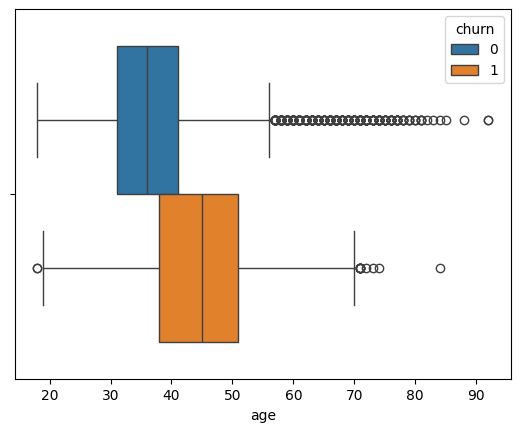

In [ ]:
sns.boxplot(explore_df,x='age',hue='churn')

<Axes: xlabel='age'>

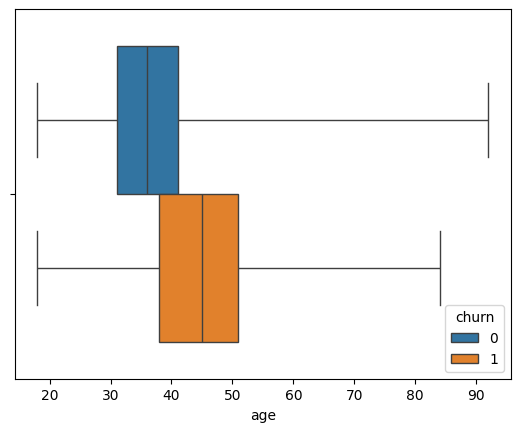

In [ ]:
sns.boxplot(explore_df,x='age',hue='churn',whis=[0,100]) # with no outliers

<Axes: xlabel='balance'>

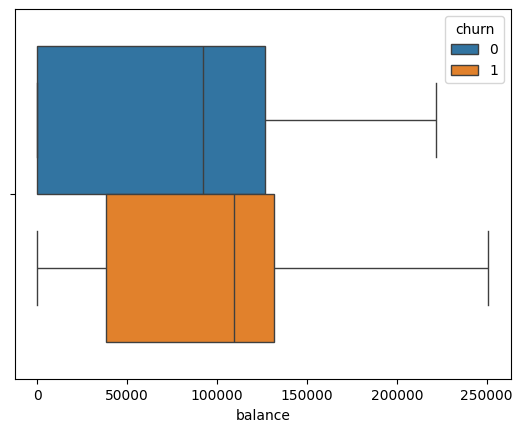

In [ ]:
sns.boxplot(explore_df,x='balance',hue='churn')

<Axes: xlabel='tenure', ylabel='count'>

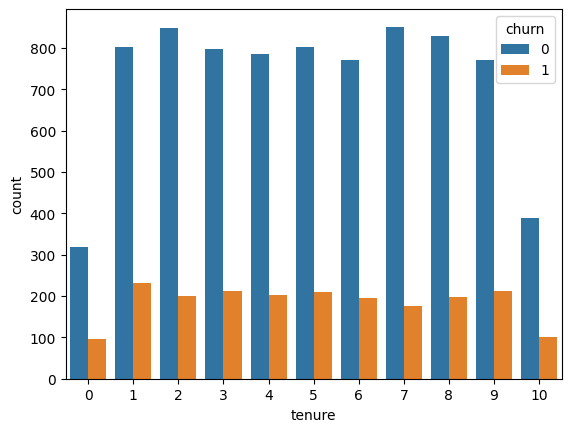

In [ ]:
sns.countplot(explore_df,x='tenure',hue='churn')

<Axes: xlabel='active_member', ylabel='count'>

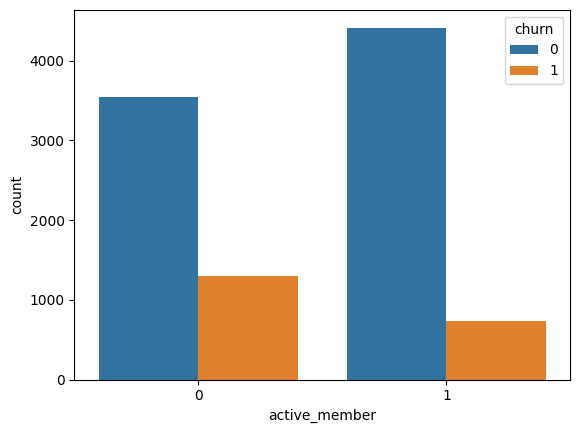

In [ ]:
sns.countplot(explore_df,x='active_member',hue='churn')

<Axes: xlabel='products_number', ylabel='count'>

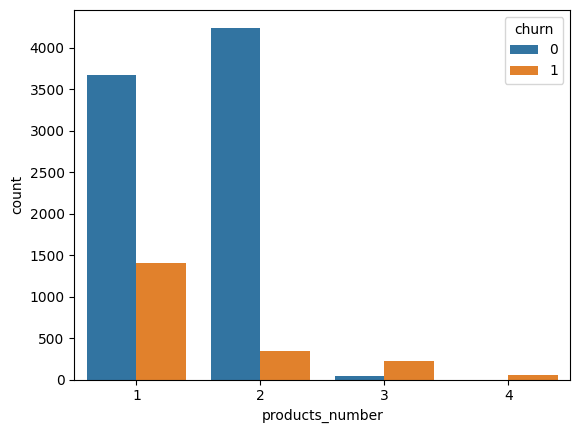

In [ ]:
sns.countplot(explore_df,x='products_number',hue='churn')

<Axes: xlabel='churn', ylabel='count'>

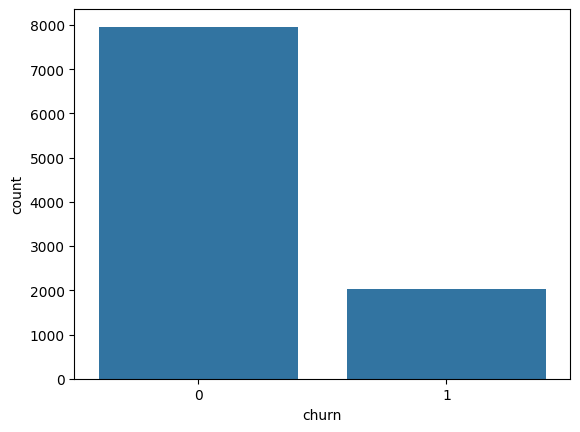

In [ ]:
sns.countplot(explore_df, x= 'churn')

In [ ]:
explore_df['churn'].value_counts(normalize=True) 

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Data is imbalanced

<Axes: xlabel='churn', ylabel='Count'>

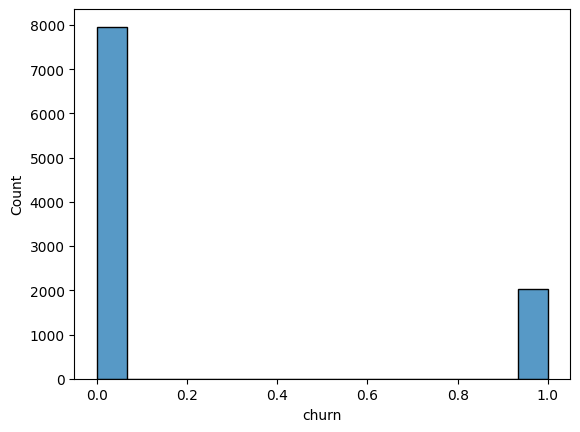

In [ ]:
sns.histplot(explore_df, x='churn')

In [ ]:
# Validating categorical data
explore_df.select_dtypes('object').head()

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
columns_info(explore_df)

,names,dtypes,unique,n_unique
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70
5,tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


<Axes: xlabel='churn', ylabel='count'>

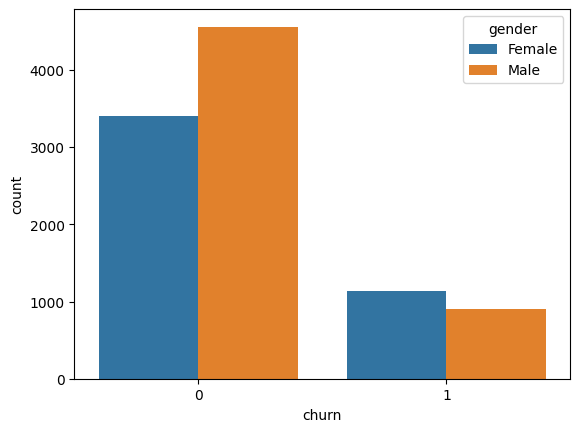

In [ ]:
sns.countplot(explore_df, x= 'churn',hue='gender')

<Axes: xlabel='estimated_salary', ylabel='Count'>

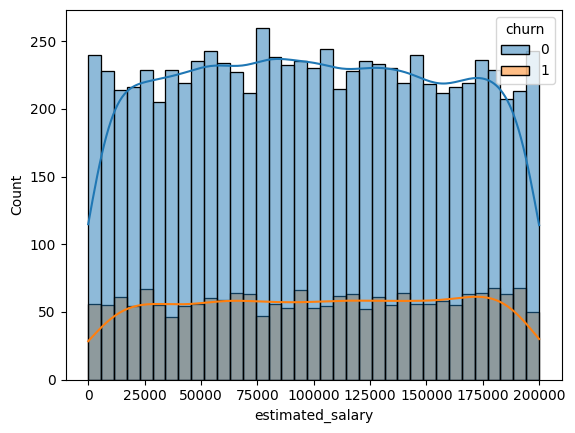

In [ ]:
# Explore numerical columns
sns.histplot(explore_df,x='estimated_salary',hue='churn',bins=35,kde=True)

<Axes: xlabel='credit_score', ylabel='Count'>

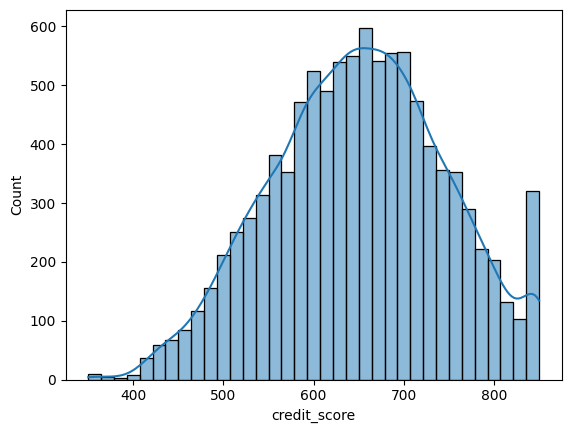

In [ ]:
# Explore numerical columns
sns.histplot(explore_df,x='credit_score',bins=35,kde=True)

In [ ]:
explore_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='balance', ylabel='Count'>

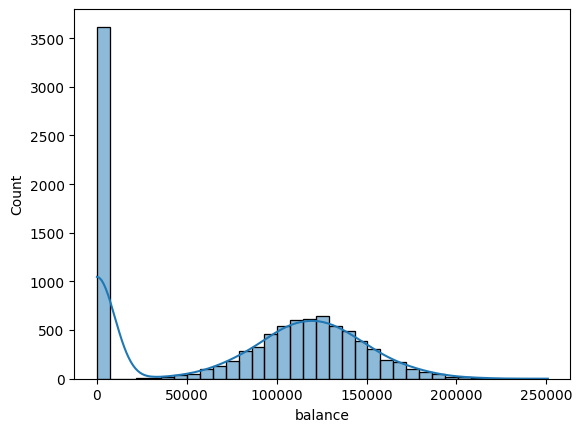

In [ ]:
sns.histplot(explore_df,x='balance',bins=35,kde=True)

In [ ]:
quantile_25 = explore_df['age'].quantile(0.25) 
median = explore_df['age'].median()
quantile_75= explore_df['age'].quantile(0.75)
max_value = explore_df['age'].max()

In [ ]:
labels=['25-35','35-45','45-55','55-65']
bins=[0,quantile_25,median,quantile_75,max_value]
explore_df['age_range'] = pd.cut(explore_df['age'],
                                labels=labels,
                                bins=bins) 

In [ ]:
explore_df[['age_range','age']].sample()

,age_range,age
5275,45-55,42


<Axes: xlabel='age_range', ylabel='count'>

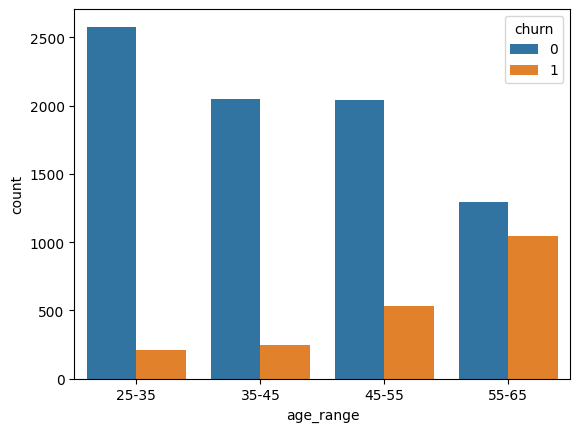

In [ ]:
sns.countplot(explore_df,x='age_range',hue='churn')

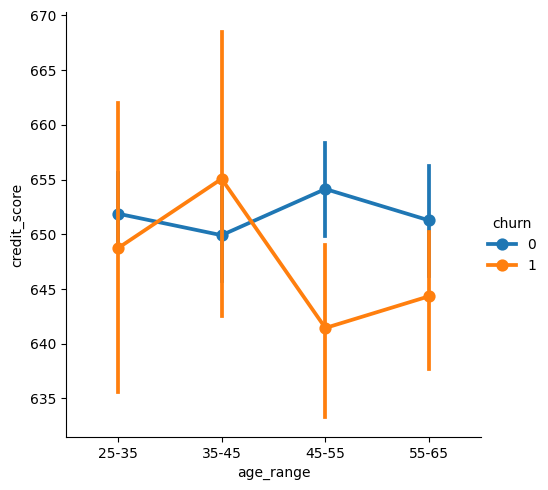

In [ ]:
# Explore categorical columns
sns.catplot(explore_df,x='age_range',y='credit_score',hue='churn',kind='point')

### Data summarization

In [ ]:
columns_info(explore_df)

,names,dtypes,unique,n_unique
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70
5,tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


In [ ]:
# Describe statistics for numerical columns
explore_df.select_dtypes('number').describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
explore_df.select_dtypes('object').describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


As we can see the data is mostly clean

### Patterns over time

### Correlation analysis

Identify highly correlated features (e.g., using a heatmap or correlation matrix).
Examine the correlation between features and the target variable.

• Describes direction and strength of relationship between two variables
• Can help us use variables to predict future outcomes

In [ ]:
explore_df.select_dtypes('number').corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

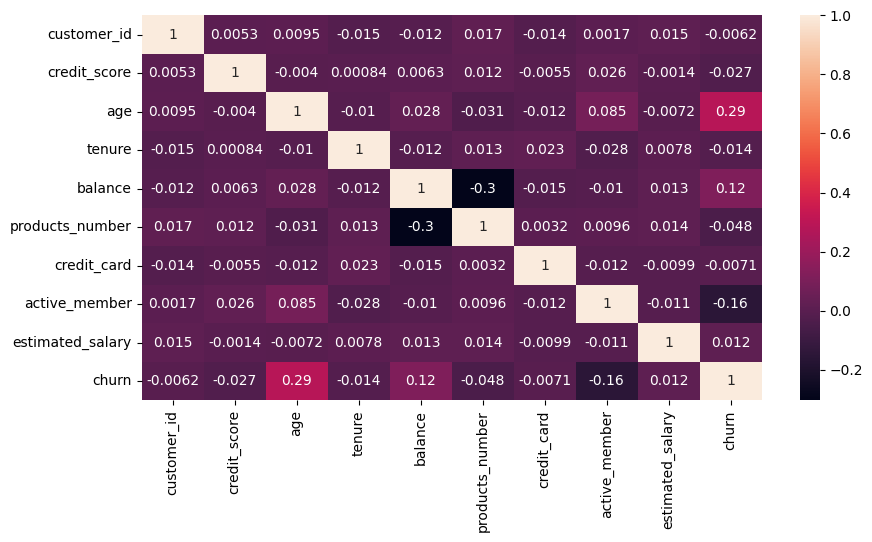

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(explore_df.select_dtypes('number').corr(),annot=True)

<Axes: xlabel='estimated_salary', ylabel='age'>

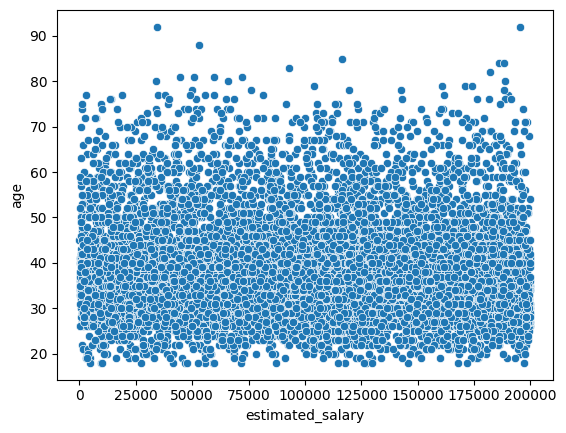

In [ ]:
sns.scatterplot(explore_df,x='estimated_salary',y='age')

### Hypothesis testing

## Data Cleaning/preparation


Main steps when cleaning data
1. Identify the problematic data
2. Clean the data
3. Remove, encode, fill in any missing data
4. Remove outliers or analyze them separately
5. Purge contaminated data and correct leaking pipelines
6. Standardize inconsistent data
7. Check if your data makes sense (is valid)
8. Deduplicate multiple records of the same dataForesee and prevent type
issues (string issues, DateTime issues)
9. Remove engineering errors (aka structural errors)
10. Rinse and repeat

**Notes:**

• Work on copies of the data (keep the original dataset intact).

• Write functions for all data transformations you apply, for five reasons:

—So you can easily prepare the data the next time you get a fresh dataset

—So you can apply these transformations in future projects

—To clean and prepare the test set

—To clean and prepare new data instances once your solution is live

—To make it easy to treat your preparation choices as hyperparameters


#### Step 1: Find the dirt (EDA)

Find out what's wrong with data

* Are there rows with empty values? Entire columns with
no data? Which data is missing and why?

* How is data distributed? Remember, visualizations are
your friends. Plot outliers. Check distributions to see

* which groups or ranges are more heavily represented in
your dataset.
* Keep an eye out for the weird: are there impossible
values? Like “date of birth: male”, “address: -1234”.
* Is your data consistent? Why are the same product
names written in uppercase and other times in
camelCase?

#### Step 2 :

Depending on the type of data dirt you’re facing, you’ll
need different cleaning techniques.


1. Clean the data:

    • Fix or remove outliers (optional).

    • Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
    columns).

2. Perform feature selection (optional):

    • Drop the attributes that provide no useful information for the task.

3. Perform feature engineering, where appropriate:

    • Discretize continuous features.

    • Decompose features (e.g., categorical, date/time, etc.).

    • Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).

    • Aggregate features into promising new features.

4. Perform feature scaling:

    • Standardize or normalize features.

#### STEP 2.1: MISSING DATA

0, “0”, empty strings, “Not Applicable”, “NA”, “#NA”, None, NaN, NULL
There are 3 methods

1. Drop rows and/or columns with missing data. If the missing data is not valuable

2. Recode missing data into a different format. Numerical computations can break down with missing data.

3. Fill in missing values. use mean, median , moving averages and backfilling/Forwardfilling to estimate the most probable values of data at that point.

In [ ]:
# missing of missing values
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

#### STEP 2.2: OUTLIERS

They usually have very high or very low values:

1. Remove outliers from the analysis. by removing the ones over the upper/75% quantile of your data and the ones under the lower/25% quanitle of your data

2. Segment data so outliers are in a separate group. Put all the “normal-looking” data in one group, and outliers in another.

3. Keep outliers, but use different statistical methods for analysis. Weighted means (which put more weight on the “normal” part of the distribution) and trimmed means are two common approaches of analyzing datasets with outlier

<Axes: xlabel='age'>

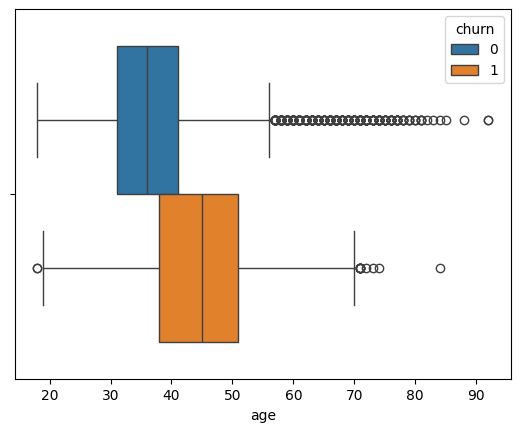

In [ ]:
sns.boxplot(df,x='age',hue='churn')

In [ ]:
df.shape

(10000, 12)

In [ ]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['age'].median()

In [ ]:
# replace outliers with median
df['age'] = df['age'].mask((df['age'] < lower_bound) | (df['age'] > upper_bound), median_value)


<Axes: xlabel='age'>

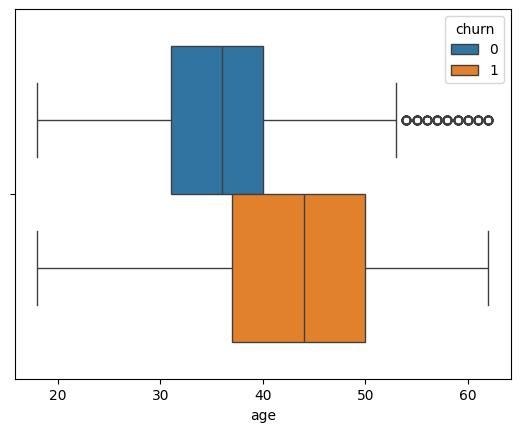

In [ ]:
sns.boxplot(df,x='age',hue='churn')

In [ ]:
df.shape

(10000, 12)

#### STEP 2.3: CONTAMINATED DATA

With corrupted data, there is not much you can do except for removing it. This requires a lot of domain expertise.

#### STEP 2.4: INCONSISTENT DATA

‘Apples’, ‘apples’, or ‘APPLES’ this month? And what is this ‘monitor stand’ for $999 under the same product ID?”

You have to expect inconsistency in your data.

Steps:

1. best way to spot inconsistent representations of the same elements in your database is to *visualize* them. Plot bar charts per product category.

2. When you spot the inconsistency, *standardize* all elements into the same format.

#### STEP 2.5: INVALID DATA

Similarly to corrupted data, invalid data is illogical.

For example, users who spend -2 hours on our app, or a person whose age is 170.

Cleaning invalid data mostly means amending the functions and transformations which caused the data to be invalid. If this is not possible, we remove the invalid data

In [ ]:
df.drop(columns='customer_id')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### STEP 2.6: DUPLICATE DATA

Duplicate data means the same values repeating for an observation point.

1. Find the same records and delete all but one

2. Pairwise match records, compare them and take the most relevant one (e.g. the most recent one

3. Combine the records into entities via clustering (e.g. the cluster of information about customer Harpreet Sahota, which has all the data associated with it


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### STEP 2.7: DATA TYPE ISSUES

##### 2.7.1 Cleaning string

The common cleaning techniques for strings involve:

* Standardizing casing across the strings 
* Removing whitespace and newlines 
* Removing stop words (for some linguistic analysis) 
* Hot-encoding categorical variables represented as strings 
* Correcting typos 
* Standardizing encodings
When in doubt, go for UTF-8 as your encoding standard.

##### 2.7.2 Cleaning date and time

* Making sure that all your dates and times are either a DateTime object or a Unix timestamp (via type coercion). Do not be tricked by strings pretending to be a DateTime object, like “24 Oct 2019”. Check for data type and coerce where necessary.

* Internationalization and time zones. DateTime objects are often recorded with the time zone or without one. Either of those can cause problems. If you are doing region-specific analysis, make sure to have DateTime in the correct timezone. If you do not care about internationalization, convert all DateTime objects to your timezone.

In [ ]:
columns_info(df)

,names,dtypes,unique,n_unique
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",45
5,tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


#### STEP 2.8: STRUCTURAL ERRORS

Structural errors arise during measurement, data transfer, or other situations.


Structural errors are given special treatment to emphasize that a lot of data cleaning is about preventing data issues rather than resolving data issues.

So you need to review your engineering best practices. 

Check your ETL pipeline and how you collect and transform data from their raw data sources to identify where the source of structural errors is and remove it.

### STEP 3: RINSE AND REPEAT

Once cleaned, you repeat steps 1 and 2.

* You might have missed something. Repeating the cleaning process helps you catch those pesky hidden issues. 

* Through cleaning, you discover new issues. For example, once you removed outliers from your dataset, you noticed that data is not bell- shaped anymore and needs reshaping before you can analyze it. 

* You learn more about your data. Every time you sweep through your dataset and look at the distributions of values, you learn more about your data, which gives you hunches as to what to analyze. Once cleaned, you repeat steps 1 and 2. This is helpful for three reasons: 

### Automate 

Mainly there are two branches of data cleaning that you can automate:

1. Problem discovery. Use any visualization tools that allow you to quickly visualize missing values and different data distributions

2. Transforming data into the desired form. The majority of data cleaning is running reusable scripts, which perform the same sequence of actions. For example: 1) lowercase all strings, 2) remove whitespace, 3) break down strings into words.


## Data encoding

Convert categorical variables into numerical formats (label encoding, one-hot encoding).


In [ ]:
import sklearn.ensemble
import imblearn

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
!pip install imblearn

ModuleNotFoundError: No module named 'imblearn'

## Imbalanced data

Class frequency

Use techniques like oversampling, undersampling, or class weights.

 If the data is unbalance 
- use oversampling and undersampling in preprocessing then 
- use model can handel the unbalance like boosting model then in evaluation 
- don't use accuracy

## Feature Scaling and Transformation (Depends on the model)

Apply scaling (Min-Max, StandardScaler) and transformations (log, square root) where needed.

## Feature Selection And Engineering
Select important features and engineer new ones.


### Creating categories

## Dimensionality reduction

## Text Preprocessing (NLP)
